# 3. Comparing metrics of glycemic control
Calculating the other metrics of diabetes control and comparing them.

## 3.1. Import packages and upload data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import sys
import pyCompare
sys.path.append("/Users/cr591/OneDrive - University of Exeter/Desktop/diametrics/diametrics")
import metrics as cgm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [6]:
#df = pd.read_csv('~/OneDrive - University of Exeter/Desktop/PhD/Projects/interpolation-for-hypo-detection/dexcom-maths-exploration/data/tidy_data/interp_dataset.csv')
df = pd.read_csv('interp_dataset.csv')
df.dropna(subset=['glc'], inplace=True)

In [7]:
# Combine baseline and 6-month periods for those who have both by selecting only the ID
df_2weeks = copy.copy(df)
#df_2weeks['ID'] = df['ID'].apply(lambda x: x[:4])

## 3.2. Diabetes metrics for each person for each interpolation method

In [9]:
# Interpolation methods
methods = ['glc', 'cut_glc', 'pchip', 'linear', 'cubicspline', 'akima', 
        'polynomial_3', 'polynomial_5', 'polynomial_7', 'matern', 'rq', 'rbf']
# Dictionary for results
results_dict = {}
# Loop through all of the columns and calculate all diabetes metrics
for method in methods:
    sub_df = df_2weeks[['time', 'ID', method]]
    sub_df.columns = ['time', 'ID', 'glc']
    # cut_glc is 15 min intervals, the rest are 5
    if method == 'cut_glc':
        interval_size = 15
    else:
        interval_size = 5
    # Add the results to the dictionary with method name as key
    results_dict[method] = cgm.all_metrics(sub_df, 'time', 'glc', 'ID',
                                           interval_size=interval_size)

In [10]:
# Diabetes metrics for 5-minute data for each person
results_dict['glc'].round(2).sort_values('ID')

,ID,TIR_lv2_hypo,TIR_lv1_hypo,TIR_hypo,TIR_norm,TIR_hyper,TIR_lv1_hyper,TIR_lv2_hyper,number_hypos,avg_length_of_hypo,total_time_in_hypos,number_lv1_hypos,number_lv2_hypos,sd,cv,minimum_glucose,maximum_glucose,average_glucose,mage_mean,ea1c,percent_missing
96,1003_6months,2.32,6.05,8.37,51.69,39.94,23.85,16.09,9,88.33,795.0,6,3,4.57,47.72,2.22,22.20,9.57,9.40,7.65,0.37
33,1003_baseline,2.44,9.76,12.20,57.06,30.74,22.51,8.23,10,112.50,1125.0,5,5,3.95,46.87,2.22,20.09,8.43,8.35,6.93,0.91
42,1004_6months,1.13,0.59,1.72,48.76,49.52,38.09,11.42,3,48.33,145.0,0,3,3.03,29.93,2.22,20.14,10.13,7.44,8.00,3.01
51,1004_baseline,1.42,2.84,4.26,33.26,62.48,16.82,45.66,6,55.00,330.0,4,2,5.66,43.72,2.22,22.20,12.95,13.36,9.78,3.99
60,1005_6months,0.00,0.70,0.70,34.49,64.80,24.62,40.18,2,27.50,55.0,2,0,4.91,39.09,3.50,22.20,12.57,13.08,9.53,0.08
36,1007_baseline,0.00,1.02,1.02,45.98,53.00,25.41,27.60,2,27.50,55.0,2,0,4.52,41.85,3.33,22.20,10.80,10.28,8.42,0.44
69,1008_baseline,7.04,8.53,15.56,58.35,26.09,19.47,6.63,17,84.71,1440.0,11,6,4.09,52.55,2.22,22.20,7.79,8.98,6.53,1.96
26,1010_6months,3.94,5.55,9.49,66.48,24.03,22.36,1.67,13,65.00,845.0,4,9,2.84,36.40,2.22,16.70,7.80,6.13,6.54,0.21
78,1010_baseline,2.73,10.60,13.33,77.99,8.68,8.38,0.30,20,59.50,1190.0,15,5,2.32,36.09,2.22,15.37,6.44,5.55,5.68,0.44
48,1011_baseline,0.00,0.28,0.28,33.41,66.31,39.78,26.52,1,20.00,20.0,1,0,3.47,29.90,3.39,22.20,11.60,8.66,8.92,1.51


In [11]:
results_dict['glc'].ea1c = (results_dict['glc'].ea1c-2.152)/0.09148

In [12]:
# Statistical overview of diabetes metrics for 5-minute data
results_dict['glc'].describe().round(2)

,TIR_lv2_hypo,TIR_lv1_hypo,TIR_hypo,TIR_norm,TIR_hyper,TIR_lv1_hyper,TIR_lv2_hyper,number_hypos,avg_length_of_hypo,total_time_in_hypos,number_lv1_hypos,number_lv2_hypos,sd,cv,minimum_glucose,maximum_glucose,average_glucose,mage_mean,ea1c,percent_missing
count,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00
mean,1.48,2.71,4.20,51.06,44.74,25.18,19.56,4.73,59.14,366.74,2.86,1.87,3.81,37.70,2.73,20.68,10.19,9.15,64.31,4.21
std,2.48,2.77,4.80,18.34,19.54,9.59,16.36,4.36,44.14,442.76,2.63,2.25,0.95,7.95,0.76,2.44,2.08,2.36,14.28,5.52
min,0.00,0.00,0.00,10.43,3.70,3.70,0.00,0.00,0.00,0.00,0.00,0.00,1.73,17.34,2.22,12.21,6.44,4.31,38.52,0.03
25%,0.00,0.64,0.82,38.47,28.66,18.98,7.80,2.00,27.81,56.25,1.00,0.00,3.17,31.68,2.22,19.88,8.64,7.72,53.70,0.49
50%,0.62,1.55,2.44,48.92,45.97,23.78,16.11,4.00,53.07,197.50,2.00,1.00,3.85,36.60,2.25,22.20,10.16,9.24,64.13,2.11
75%,2.04,3.80,5.48,63.55,57.15,32.16,27.51,6.00,80.75,507.50,4.00,3.00,4.51,43.50,3.10,22.20,11.33,10.83,72.17,5.00
max,16.02,11.32,24.27,92.60,88.95,61.64,78.74,20.00,225.00,2290.00,15.00,11.00,6.32,59.94,6.22,22.22,17.38,16.23,113.75,24.76


## 4.3. Mean difference for all of the metrics

Here I calculate the mean difference between the interpolation methods with the original 5-minute data for all of the metrics of diabetes control.

In [17]:
results_dict['glc'].columns

Index(['ID', 'TIR_lv2_hypo', 'TIR_lv1_hypo', 'TIR_hypo', 'TIR_norm',
       'TIR_hyper', 'TIR_lv1_hyper', 'TIR_lv2_hyper', 'number_hypos',
       'avg_length_of_hypo', 'total_time_in_hypos', 'number_lv1_hypos',
       'number_lv2_hypos', 'sd', 'cv', 'minimum_glucose', 'maximum_glucose',
       'average_glucose', 'mage_mean', 'ea1c', 'percent_missing'],
      dtype='object')

In [20]:
# List of the metrics of diabetes control
metrics = ['TIR_lv2_hypo', 'TIR_lv1_hypo', 'TIR_hypo', 'TIR_norm', 'TIR_hyper',
           'TIR_lv1_hyper', 'TIR_lv2_hyper', 'number_hypos', 'number_lv1_hypos',
           'number_lv2_hypos', 'sd', 'cv', 'ea1c', 'average_glucose',
           'mage_mean']
# Get the interpolation methods from the keys of the dictionary
methods = results_dict.keys()

In [21]:
# Declare list for results
perc_diff_list = []
# For each metric in each method, calculate the mean difference compared to 5-minute data
for method in methods:
    for metric in metrics:
        diff =  results_dict['glc'][metric] - results_dict[method][metric]
        mean_diff = diff.mean()
        perc_diff_list.append([method, metric, mean_diff])
# Convert to dataframe       
perc_diff_df = pd.DataFrame(perc_diff_list, columns = ['method', 'metric', 'mean_diff'])

In [22]:
# Mean difference table
pd.pivot_table(perc_diff_df, index=['method'], columns=['metric'])

mean_diff                                                     \
metric       TIR_hyper  TIR_hypo TIR_lv1_hyper TIR_lv1_hypo TIR_lv2_hyper   
method                                                                      
akima        -0.049443  0.074163     -0.068171     0.085566      0.018728   
cubicspline  -0.069906  0.069820     -0.075706     0.092910      0.005800   
cut_glc      -0.073143  0.001064     -0.079584    -0.006481      0.006441   
glc           0.000000  0.000000      0.000000     0.000000      0.000000   
linear       -0.067395  0.158806     -0.119230     0.103625      0.051835   
matern        0.047175  0.055540     -0.035152     0.092878      0.082326   
pchip        -0.054257  0.088024     -0.075739     0.087637      0.021481   
polynomial_3 -0.069906  0.069820     -0.075706     0.092910      0.005800   
polynomial_5 -0.078953  0.068714     -0.084136     0.099394      0.005183   
polynomial_7 -0.086635  0.067512     -0.087231     0.101304      0.000596   
rbf          -0.076566  0.071242     -0.088923     0.102211      0.012357   
rq           -0.049614  0.137469     -0.115785     0.108464      0.066171   

                                                                          \
metric       TIR_lv2_hypo  TIR_norm average_glucose        cv       ea1c   
method                                                                     
akima           -0.011403 -0.024720       -0.001017  0.063899  56.273469   
cubicspline     -0.023090  0.000086       -0.001048  0.028157  56.273450   
cut_glc          0.007545  0.072079       -0.003562 -0.016730  56.271868   
glc              0.000000  0.000000        0.000000  0.000000   0.000000   
linear           0.055181 -0.091411       -0.001030  0.200557  56.273461   
matern          -0.037338 -0.102715        0.011468  0.015301  56.281322   
pchip            0.000387 -0.033767       -0.001041  0.080393  56.273454   
polynomial_3    -0.023090  0.000086       -0.001048  0.028157  56.273450   
polynomial_5    -0.030680  0.010239       -0.001070  0.015339  56.273436   
polynomial_7    -0.033793  0.019123       -0.000964  0.002729  56.273502   
rbf             -0.030969  0.005324       -0.000043  0.008068  56.274082   
rq               0.029005 -0.087855        0.000184  0.181857  56.274225   

                                                                       \
metric       mage_mean number_hypos number_lv1_hypos number_lv2_hypos   
method                                                                  
akima        -0.005974    -0.028302        -0.018868        -0.009434   
cubicspline  -0.034853    -0.056604         0.000000        -0.056604   
cut_glc      -0.043147     0.320755         0.132075         0.188679   
glc           0.000000     0.000000         0.000000         0.000000   
linear       -0.008218     0.122642         0.028302         0.094340   
matern        0.024755    -0.084906        -0.028302        -0.056604   
pchip        -0.029781     0.000000        -0.009434         0.009434   
polynomial_3 -0.034853    -0.056604         0.000000        -0.056604   
polynomial_5 -0.045190    -0.084906        -0.009434        -0.075472   
polynomial_7 -0.048499    -0.075472         0.000000        -0.075472   
rbf          -0.018138    -0.066038        -0.009434        -0.056604   
rq           -0.002133     0.056604         0.018868         0.037736   

                        
metric              sd  
method                  
akima         0.005777  
cubicspline   0.002336  
cut_glc      -0.003617  
glc           0.000000  
linear        0.019149  
matern        0.005702  
pchip         0.007371  
polynomial_3  0.002336  
polynomial_5  0.001093  
polynomial_7 -0.000125  
rbf           0.000748  
rq            0.017964

## 4.4. Bland-Altman plots

Blant-Altman plots show us a more detailed spread than the mean difference alone.

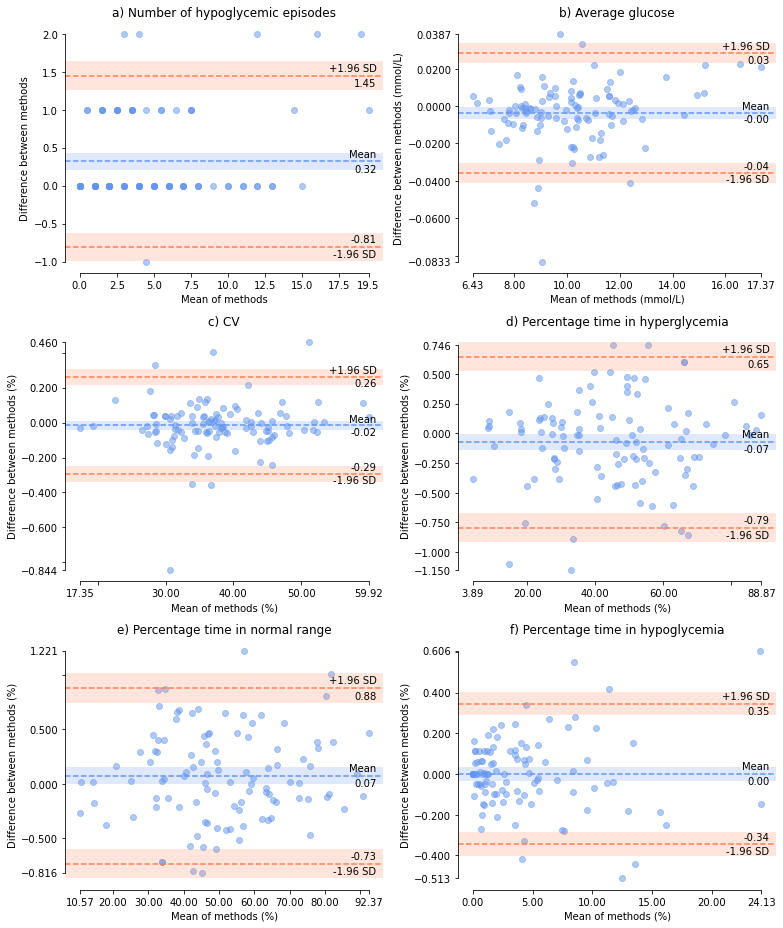

In [24]:
# Create matplotlib figure
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(11,13))
# Number of hypoglycaemic episodes
pyCompare.blandAltman(results_dict['glc']['number_hypos'], 
                      results_dict['cut_glc']['number_hypos'], ax=ax1)
ax1.set_title('a) Number of hypoglycemic episodes')

# Average glucose
pyCompare.blandAltman(results_dict['glc']['average_glucose'], 
                      results_dict['cut_glc']['average_glucose'], ax=ax2)
ax2.set_title('b) Average glucose')
ax2.set_xlabel('Mean of methods (mmol/L)')
ax2.set_ylabel('Difference between methods (mmol/L)')
# Standard deviation/glycaemic variability
pyCompare.blandAltman(results_dict['glc']['cv'], 
                      results_dict['cut_glc']['cv'], ax=ax3)
ax3.set_title('c) CV')
ax3.set_xlabel('Mean of methods (%)')
ax3.set_ylabel('Difference between methods (%)')
# Time in range (TIR) hyperglycaemia 
pyCompare.blandAltman(results_dict['glc']['TIR_hyper'], 
                      results_dict['cut_glc']['TIR_hyper'], ax=ax4)
ax4.set_title('d) Percentage time in hyperglycemia')
ax4.set_xlabel('Mean of methods (%)')
ax4.set_ylabel('Difference between methods (%)')
# TIR normal
pyCompare.blandAltman(results_dict['glc']['TIR_norm'], 
                      results_dict['cut_glc']['TIR_norm'], ax=ax5)
ax5.set_title('e) Percentage time in normal range')
ax5.set_xlabel('Mean of methods (%)')
ax5.set_ylabel('Difference between methods (%)')
# TIR hyperglycaemia
pyCompare.blandAltman(results_dict['glc']['TIR_hypo'], 
                      results_dict['cut_glc']['TIR_hypo'], ax=ax6)
# Set title and save
ax6.set_title('f) Percentage time in hypoglycemia')
ax6.set_xlabel('Mean of methods (%)')
ax6.set_ylabel('Difference between methods (%)')

fig.tight_layout()
fig.savefig('bland_altmans.svg')

## 4.5. Distribution of hypos per person

In [52]:
# Number of people having more than 10 hypos
(results_dict['glc']['number_hypos']>10).value_counts()

False    94
True     12
Name: number_hypos, dtype: int64

In [43]:
# Number of hypos per trace
results_dict['glc'][['ID', 'number_hypos', 'number_lv1_hypos', 'number_lv2_hypos']]

,ID,number_hypos,number_lv1_hypos,number_lv2_hypos
0,1032_baseline,4,2,2
1,2018_baseline,4,2,2
2,2031_6months,0,0,0
3,1040_6months,15,8,7
4,2008_baseline,6,2,4
5,1030_baseline,2,1,1
6,2028_baseline,4,1,3
7,2031_baseline,7,6,1
8,2036_6months,1,1,0
9,1020_baseline,8,4,4
